In [1]:
import os
os.chdir('/Users/calebward/LHL_project_IV')
os.getcwd()

'/Users/calebward/LHL_project_IV'

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("data/data.csv")
X = df.drop('Loan_Status', axis = 1)
y = df.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [3]:

from src.modules import build_gridsearch, build_pipeline, helper
pipe = build_pipeline.build(X_train, y_train, droplist = ['Loan_ID'])
grid = build_gridsearch.build(pipe)
pipeline = pipe.complete_pipeline()

In [4]:
model = pipeline.fit(X_train, y_train)

In [9]:
y_pred = pipeline.predict(X_test)

/Users/calebward/PythonEnvs/Lighthouse/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


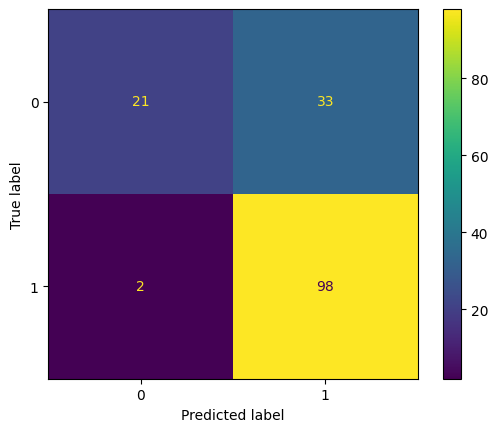

In [23]:
from sklearn.metrics import plot_confusion_matrix


disp = plot_confusion_matrix(model, X_test, y_test.str.strip().eq("Y").mul(1))

Text(50.722222222222214, 0.5, 'True Label')

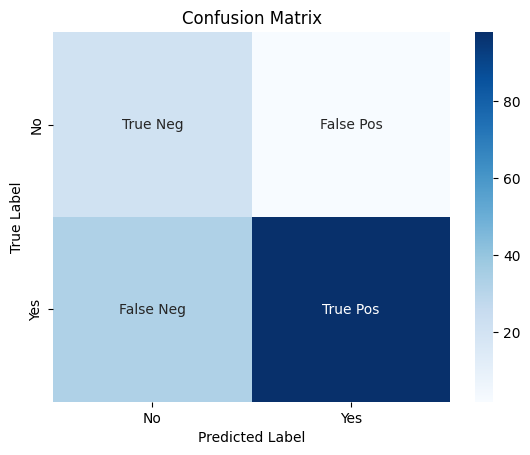

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
disp = confusion_matrix(y_pred, y_test.str.strip().eq("Y").mul(1))
sns.heatmap(disp, fmt='', cmap='Blues', annot = labels, xticklabels = ['No', 'Yes'], yticklabels = ['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')